<a href="https://colab.research.google.com/github/rahiakela/audio-processing-research-and-practice/blob/main/fundamentals-of-music-processing/01-basics/02_python_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Python Audio

<p>
There are several ways to read and write audio files in Python, using different packages. This notebooks lists some options and discusses advantages as well as disadvantages. For detailed explanations on how to integrate audio files into the notebooks, we refer to the <a href="../B/B_Multimedia.html">FMP notebook on Multimedia</a>.</p>

**Reference**:

[Audio Basics](https://www.audiolabs-erlangen.de/resources/MIR/FMP/B/B.html)

[Python Audio](https://www.audiolabs-erlangen.de/resources/MIR/FMP/B/B_PythonAudio.html)


##Setup

In [ ]:
!wget https://github.com/rahiakela/audio-processing-research-and-practice/raw/main/fundamentals-of-music-processing/01-basics/data/data.zip

!unzip data.zip
!rm -rf data.zip

In [ ]:
!pip install libfmp

In [4]:
import os
import sys
import numpy as np
from matplotlib import pyplot as plt
import IPython.display as ipd
import librosa
import pandas as pd

import soundfile as sf
from scipy.io import wavfile
import libfmp.b


%matplotlib inline

In [5]:
def print_plot_play(x, Fs, text=''):
    """1. Prints information about an audio singal, 2. plots the waveform, and 3. Creates player

    Notebook: C1/B_PythonAudio.ipynb

    Args:
        x: Input signal
        Fs: Sampling rate of x
        text: Text to print
    """
    print('%s Fs = %d, x.shape = %s, x.dtype = %s' % (text, Fs, x.shape, x.dtype))
    plt.figure(figsize=(8, 2))
    plt.plot(x, color='gray')
    plt.xlim([0, x.shape[0]])
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    ipd.display(ipd.Audio(data=x, rate=Fs))

##LibROSA


One option to read audio is to use LibROSA's function [`librosa.load`](https://librosa.org/doc/latest/generated/librosa.load.html).

* Per default, `librosa.load` resamples the audio to $22050~\mathrm{Hz}$. Setting `sr=None` keeps the native sampling rate.
* The loaded audio is converted to a float with amplitude values lying in the range of $[-1, 1]$.
* `librosa.load` is essentially a wrapper that uses either [`PySoundFile`](https://pysoundfile.readthedocs.io) or [`audioread`](https://github.com/beetbox/audioread).
* When reading audio, `librosa.load` first tries to use [`PySoundFile`](https://pysoundfile.readthedocs.io). This works for many formats, such as WAV, FLAC, and OGG. However, MP3 is not supported. When `PySoundFile` fails to read the audio file (e.g., for MP3), a warning is issued, and `librosa.load` falls back to another library called [`audioread`](https://github.com/beetbox/audioread). When [`ffmpeg`](https://ffmpeg.org/) is available, this library can read MP3 files.

WAV file:  Fs = 11025, x.shape = (45504,), x.dtype = float32


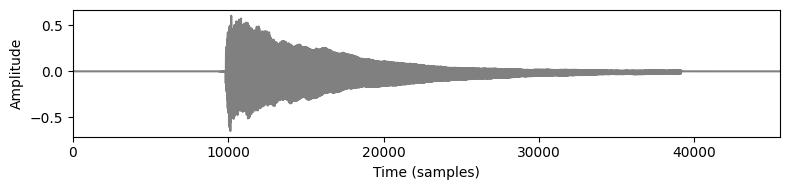

In [6]:
# Read wav
fn_wav = os.path.join("data", "FMP_B_Note-C4_Piano.wav")
x , Fs = librosa.load(fn_wav, sr=None)
print_plot_play(x=x, Fs=Fs, text="WAV file: ")

MP3 file:  Fs = 11025, x.shape = (47232,), x.dtype = float32


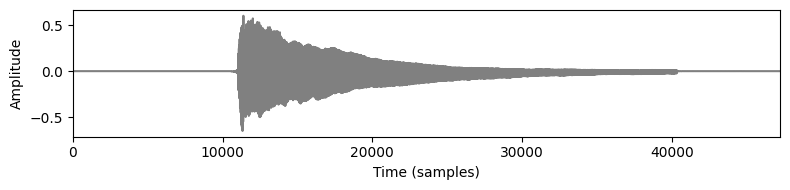

In [8]:
# read mp3
fn_mp3 = os.path.join("data", "FMP_B_Note-C4_Piano.mp3")
x , Fs = librosa.load(fn_mp3, sr=None)
print_plot_play(x=x, Fs=Fs, text="MP3 file: ")

## PySoundFile

The audio library [`PySoundFile`](https://pysoundfile.readthedocs.io/en/0.9.0/) yields functions for reading and writing sound files. In particular, it contains the functions [`soundfile.read`](https://pysoundfile.readthedocs.io/en/latest/#soundfile.read) and [`soundfile.write`](https://pysoundfile.readthedocs.io/en/latest/#soundfile.write).

* Per default, the loaded audio is converted to a float with amplitude values lying in the range of $[-1, 1]$. This default can be changed using the `dtype` keyword.
* When writing, it uses signed $16$-bit PCM (`subtype='PCM_16'`) as default.
* There are no resampling options.
* There is no option to read `MP3`-files.

WAV file (default):  Fs = 11025, x.shape = (45504,), x.dtype = float64


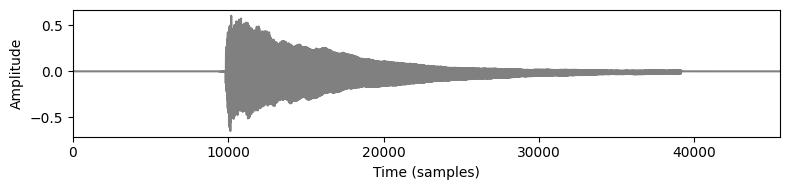

In [9]:
# Read wav with default
fn_wav  = os.path.join("data", "FMP_B_Note-C4_Piano.wav")
x , Fs = sf.read(fn_wav)
print_plot_play(x=x, Fs=Fs, text="WAV file (default): ")

WAV file (dtype=int16):  Fs = 11025, x.shape = (45504,), x.dtype = int16


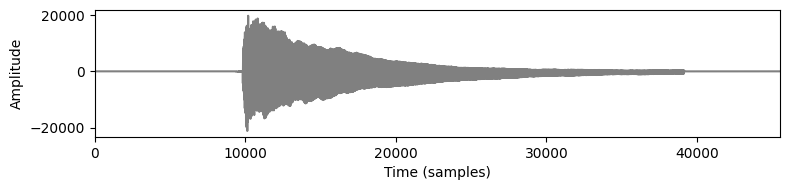

In [10]:
# Read wav with dtype= 'int16'
fn_wav  = os.path.join("data", "FMP_B_Note-C4_Piano.wav")
x , Fs = sf.read(fn_wav, dtype="int16")
print_plot_play(x=x, Fs=Fs, text="WAV file (dtype=int16): ")

Signal (int16) after writing and reading (default):  Fs = 11025, x.shape = (45504,), x.dtype = float64


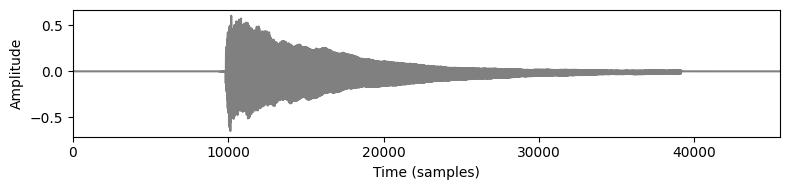

In [12]:
# Write 'int16'-signal and read with default
fn_out  = os.path.join("data", "FMP_B_Note-C4_Piano_int16.wav")
sf.write(fn_out, x, Fs)
x, Fs = sf.read(fn_out)
print_plot_play(x=x, Fs=Fs, text="Signal (int16) after writing and reading (default): ")

Generated signal:  Fs = 8000, x.shape = (8000,), x.dtype = float64


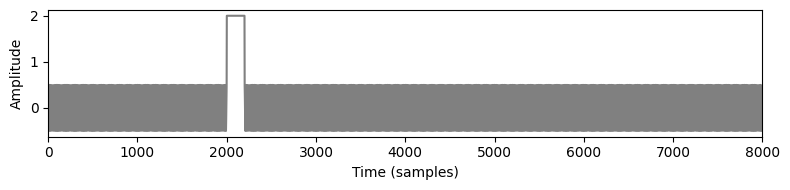

In [13]:
# Generate signal
Fs = 8000
x = 0.5 * np.cos(2 * np.pi * 440 * np.arange(0, Fs) / Fs)
x[2000:2200] = 2
print_plot_play(x=x, Fs=Fs, text="Generated signal: ")

Default for writing files: PCM_16
Signal after writing and reading:  Fs = 8000, x.shape = (8000,), x.dtype = float64


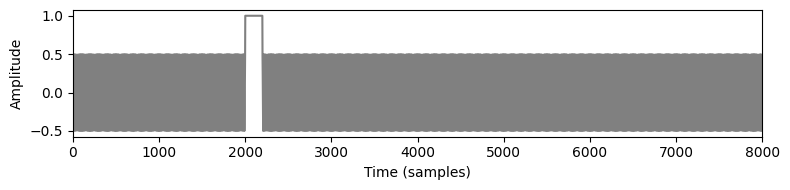

In [14]:
# Write signal
# Default: 'PCM_16'
# Equivalent to pre-processing (dithering + quantization)
# x = np.int16(np.round(x*(2**15)))
print(f"Default for writing files: {sf.default_subtype('WAV')}")
fn_out = os.path.join("data", "FMP_B_PythonAudio_sine.wav")
sf.write(fn_out, x, Fs, subtype="PCM_16")

# Read generated signal
x, Fs = sf.read(fn_out)
print_plot_play(x=x, Fs=Fs, text="Signal after writing and reading: ")

## SciPy

Scipy offers the [`scipy.io.wavfile`](https://docs.scipy.org/doc/scipy/reference/io.html#module-scipy.io.wavfile) module, which also has functionalities for reading and writing wav files. However, not all variants of the wav format are support. For example, $24$-bit integer `WAV`-files are not allowed. Furthermore, certain metadata fields in a wav file may also lead to errors. Therefore, we do not recommend this option.